# Assignment #3
### Gagana Uday Kumar (WOV796)

### 13. This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.













In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [145]:
Weekly = pd.read_csv('Weekly.csv',na_values=['?']).dropna()
Weekly

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
...    ...    ...    ...    ...    ...    ...       ...    ...       ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969        Up
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281        Up
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283        Up
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034        Up
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069        Up

[1089 rows x 9 columns]

In [146]:
Weekly.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75%       1.405000     2.053727     1.405000  
max      12.026000     9.328214    12.026000

In [147]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


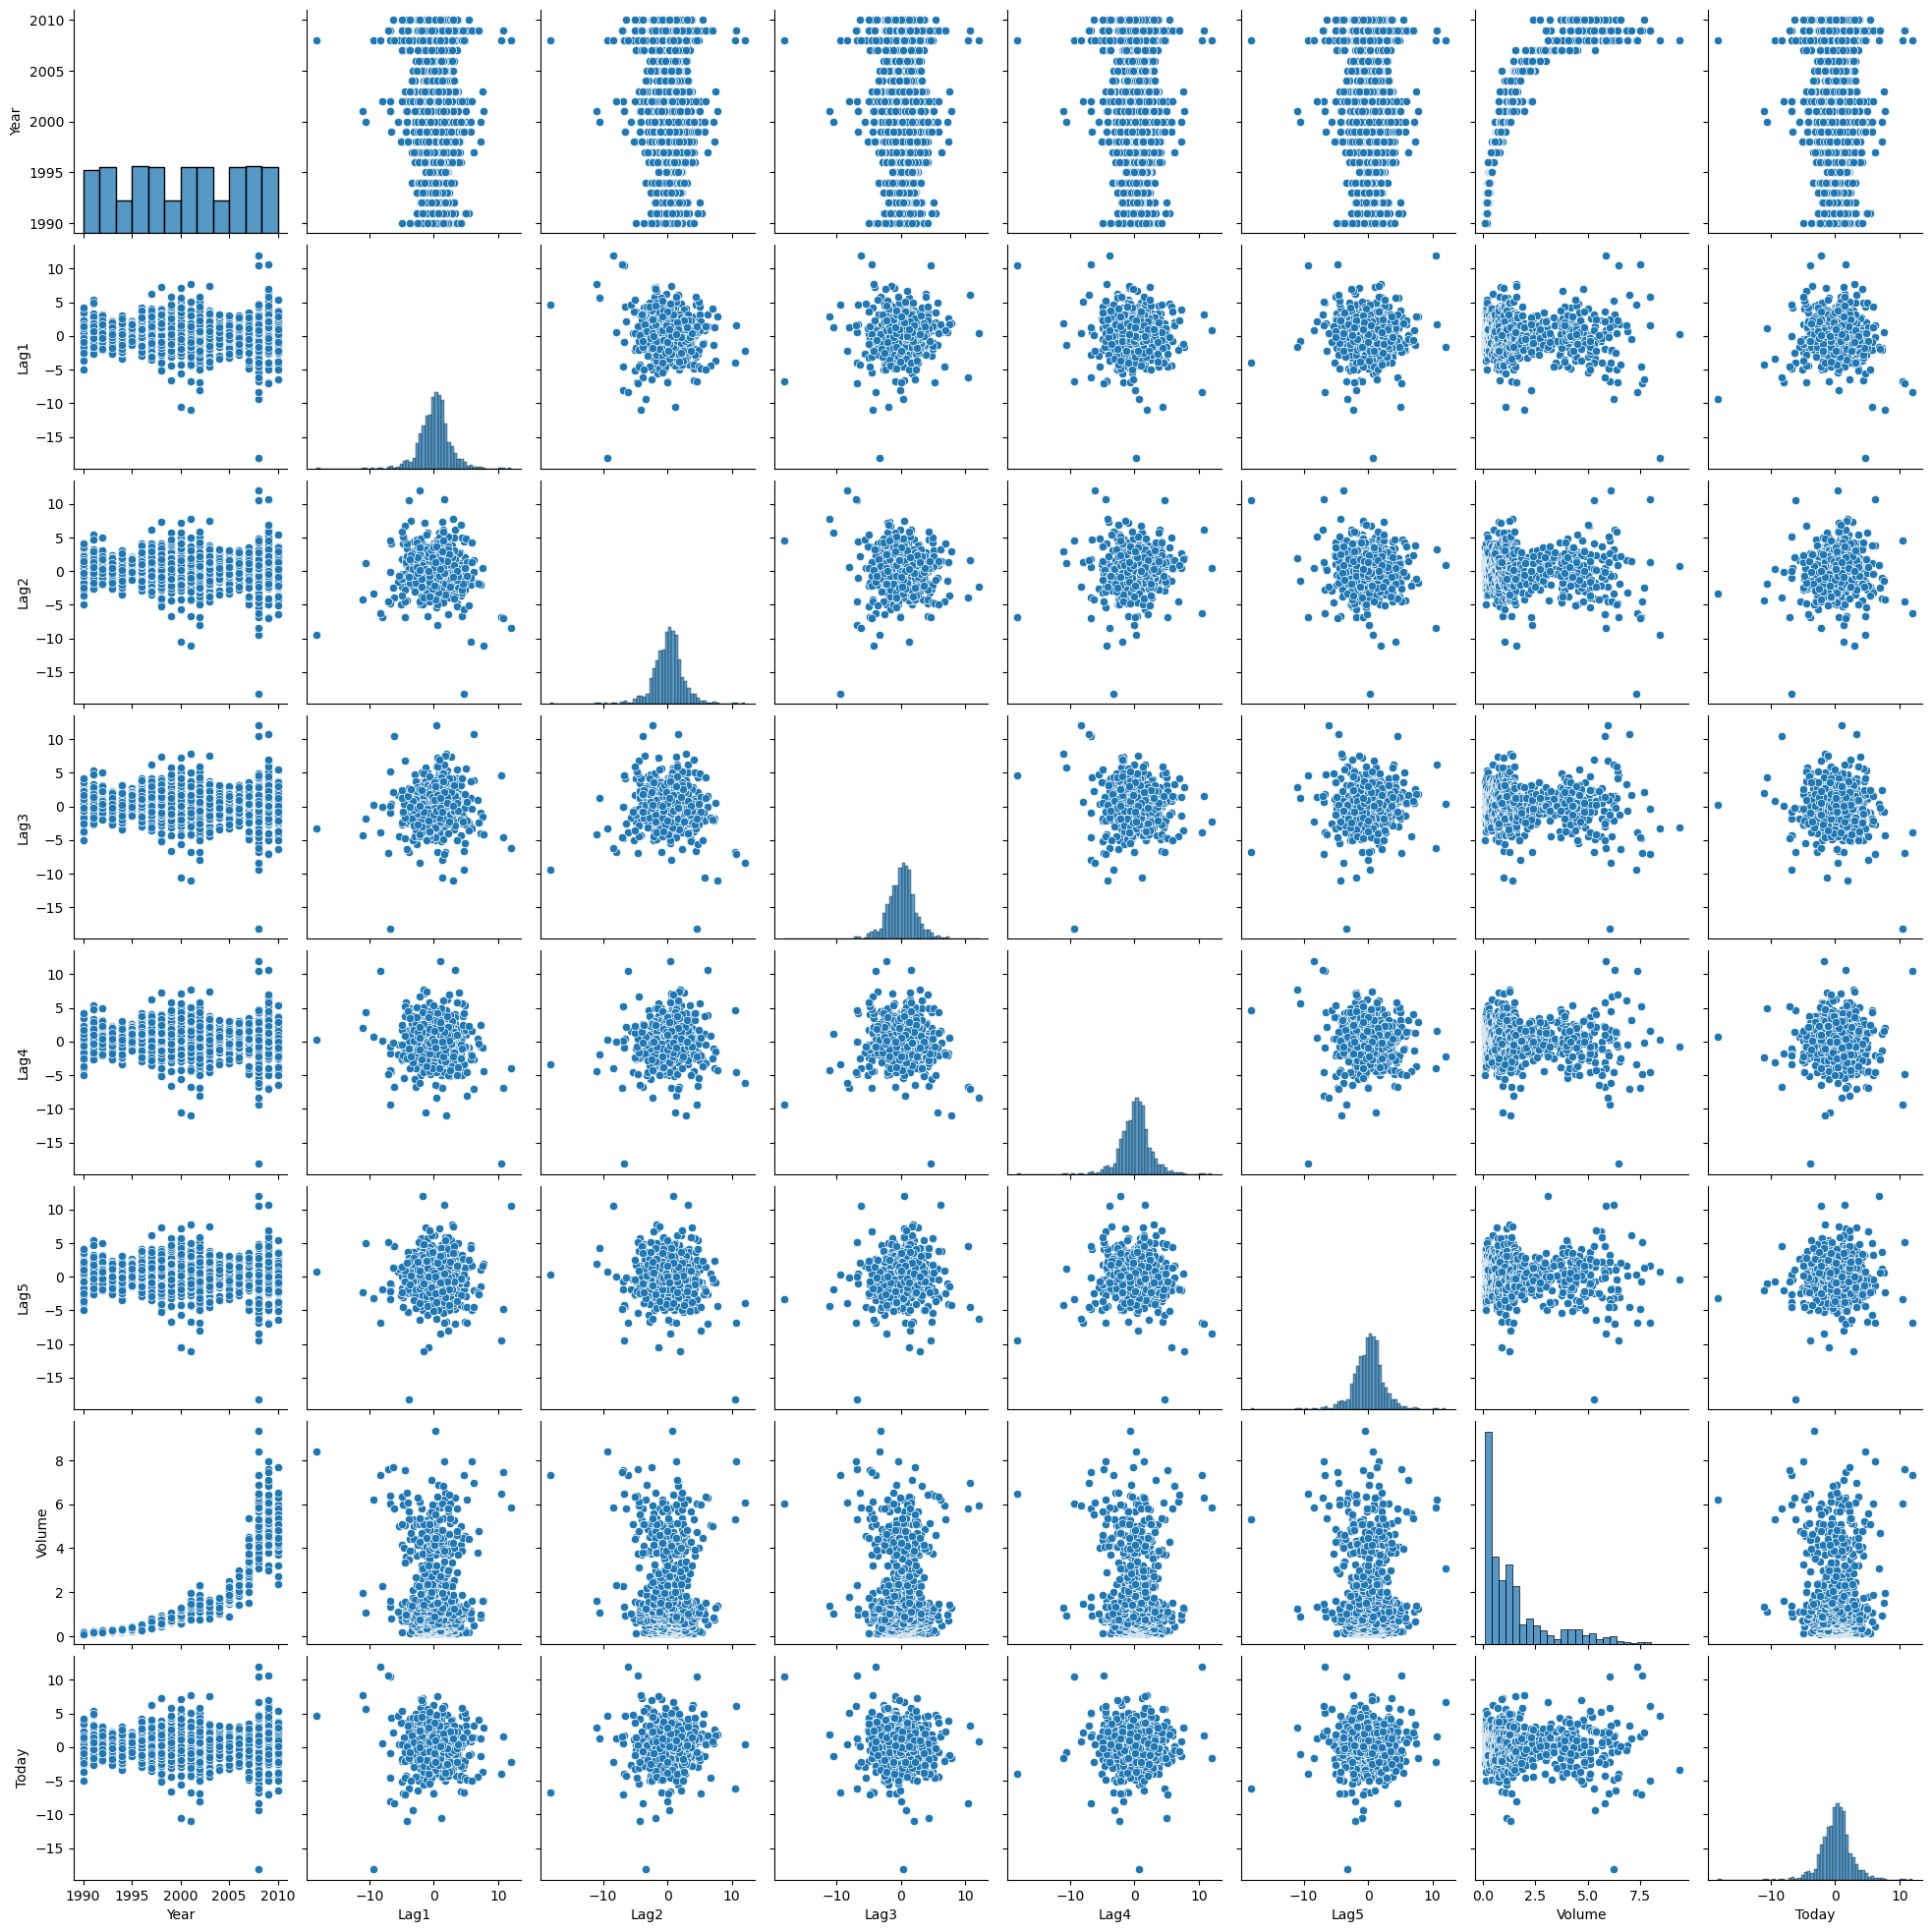

In [148]:
sns.pairplot(Weekly)

In [149]:
Weekly.corr()

C:\Users\gagss\AppData\Local\Temp\ipykernel_17376\2431327265.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Weekly.corr()


Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [150]:
allvars = Weekly.columns.drop(['Today', 'Year','Direction'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'
glm = sm.GLM(y,X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

coef  std err      z  P>|z|
intercept  0.2669    0.086  3.106  0.002
Lag1      -0.0413    0.026 -1.563  0.118
Lag2       0.0584    0.027  2.175  0.030
Lag3      -0.0161    0.027 -0.602  0.547
Lag4      -0.0278    0.026 -1.050  0.294
Lag5      -0.0145    0.026 -0.549  0.583
Volume    -0.0227    0.037 -0.616  0.538

### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [151]:
probs = results.predict()
probs[:10]

array([0.60862494, 0.60103144, 0.58756995, 0.48164156, 0.61690129,
       0.56841902, 0.57860971, 0.51519724, 0.57151998, 0.55542873])

In [152]:
probs = results.predict()

# Convert probabilities to labels based on a threshold (e.g., 0.5)
labels = np.where(probs > 0.5, 'Up', 'Down')

# Create confusion table
confusion_table = pd.crosstab(Weekly['Direction'], labels, rownames=['Actual'], colnames=['Predicted'])

# Display confusion table
print(confusion_table)

Predicted  Down   Up
Actual              
Down         54  430
Up           48  557


### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [153]:
train = (Weekly.Year < 2008)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape

(156, 9)

In [154]:
# Create training and testing datasets
train = (Weekly['Year'] < 2008)
Weekly_train = Weekly[train]
Weekly_test = Weekly[~train]

# Fit logistic regression model
X_train = Weekly_train[['Lag2']]  # Predictor
y_train = Weekly_train['Direction']  # Response

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test set
X_test = Weekly_test[['Lag2']]
y_test = Weekly_test['Direction']
y_pred = log_reg.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute overall fraction of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print("Overall Fraction of Correct Predictions:", accuracy)

Confusion Matrix:
[[ 6 66]
 [ 5 79]]
Overall Fraction of Correct Predictions: 0.5448717948717948


### (e) Repeat (d) using LDA.

In [155]:
lda = LDA(store_covariance=True)

In [156]:
# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

X_test = Weekly_test[['Lag2']].values
y_test = Weekly_test['Direction'].values
y_pred = lda.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[ 6 66]
 [ 5 79]]
Accuracy: 0.5448717948717948


C:\Users\gagss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


### (f) Repeat (d) using QDA.

In [157]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[ 0 72]
 [ 0 84]]
Accuracy: 0.5384615384615384


C:\Users\gagss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


### (g) Repeat (d) using KNN with K = 1.

In [158]:
k = 1  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN model
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.47435897435897434
Confusion Matrix:
[[30 42]
 [40 44]]


C:\Users\gagss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### (h) Repeat (d) using naive Bayes.

In [159]:
nb_classifier = GaussianNB()

# Fit the Naive Bayes model
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.5384615384615384
Confusion Matrix:
[[ 0 72]
 [ 0 84]]


C:\Users\gagss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### (i) Which of these methods appears to provide the best results on this data?

Based on the test errors and confusion matrices obtained for each method, we can assess the performance of each model as follows:

Logistic Regression: The overall fraction of correct predictions is approximately 54.49%, with a confusion matrix showing 6 true positives, 66 false negatives, 5 false positives, and 79 true negatives.

LDA (Linear Discriminant Analysis): The results are the same as logistic regression, with an overall accuracy of approximately 54.49%.

QDA (Quadratic Discriminant Analysis): The model performs slightly worse, with an accuracy of approximately 53.85%. However, it incorrectly predicts all instances as "Up".

KNN (K-Nearest Neighbors) with K=1: This method provides the lowest accuracy of approximately 47.44%. It has 30 true positives, 42 false negatives, 40 false positives, and 44 true negatives.

Naive Bayes: The results are the same as QDA, with an accuracy of approximately 53.85%. However, it incorrectly predicts all instances as "Up".

Among these methods, logistic regression and LDA provide the best results with similar accuracy rates. However, it's important to note that the performance might vary depending on the specific dataset and problem at hand.

### (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [160]:
# Split data into training and test sets
train = (Weekly['Year'] < 2008)
Weekly_train = Weekly[train]
Weekly_test = Weekly[~train]

# Define predictor variables and target variable
predictors = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']  # Initial predictors

# Logistic Regression
X_train_lr = Weekly_train[predictors]
y_train_lr = Weekly_train['Direction']
X_test_lr = Weekly_test[predictors]
y_test_lr = Weekly_test['Direction']

log_reg = LogisticRegression()
log_reg.fit(X_train_lr, y_train_lr)
y_pred_lr = log_reg.predict(X_test_lr)
confusion_lr = confusion_matrix(y_test_lr, y_pred_lr)
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lr, y_train_lr)
y_pred_lda = lda.predict(X_test_lr)
confusion_lda = confusion_matrix(y_test_lr, y_pred_lda)
accuracy_lda = accuracy_score(y_test_lr, y_pred_lda)

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_lr, y_train_lr)
y_pred_qda = qda.predict(X_test_lr)
confusion_qda = confusion_matrix(y_test_lr, y_pred_qda)
accuracy_qda = accuracy_score(y_test_lr, y_pred_qda)

# KNN
best_accuracy_knn = 0
best_confusion_knn = None
best_k_knn = None

for k in range(1, 21):  # Try different values of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_lr, y_train_lr)
    y_pred_knn = knn.predict(X_test_lr)
    accuracy_knn = accuracy_score(y_test_lr, y_pred_knn)
    if accuracy_knn > best_accuracy_knn:
        best_accuracy_knn = accuracy_knn
        best_confusion_knn = confusion_matrix(y_test_lr, y_pred_knn)
        best_k_knn = k

# Report the best results
print("Logistic Regression:")
print("Confusion Matrix:")
print(confusion_lr)
print("Accuracy:", accuracy_lr)

print("\nLDA:")
print("Confusion Matrix:")
print(confusion_lda)
print("Accuracy:", accuracy_lda)

print("\nQDA:")
print("Confusion Matrix:")
print(confusion_qda)
print("Accuracy:", accuracy_qda)

print("\nKNN (Best K={}):".format(best_k_knn))
print("Confusion Matrix:")
print(best_confusion_knn)
print("Accuracy:", best_accuracy_knn)

Logistic Regression:
Confusion Matrix:
[[22 50]
 [26 58]]
Accuracy: 0.5128205128205128

LDA:
Confusion Matrix:
[[22 50]
 [26 58]]
Accuracy: 0.5128205128205128

QDA:
Confusion Matrix:
[[ 8 64]
 [ 7 77]]
Accuracy: 0.5448717948717948

KNN (Best K=5):
Confusion Matrix:
[[27 45]
 [24 60]]
Accuracy: 0.5576923076923077


Based on the results obtained:

Logistic Regression and LDA both yield similar confusion matrices and accuracies, with an accuracy of approximately 51%. This suggests that the models struggle to effectively classify the data, possibly due to the linear assumption of the logistic regression and LDA models.

QDA provides a slightly improved accuracy of around 54% compared to logistic regression and LDA. However, the confusion matrix indicates that the model still misclassifies a significant number of observations.

KNN with the best value of K=5 achieves the highest accuracy of approximately 56%. This suggests that the KNN model with a small number of neighbors outperforms logistic regression, LDA, and QDA in terms of predictive accuracy. However, the performance improvement is modest, indicating that the dataset might be inherently challenging for classification tasks.

In summary, among the models tested, KNN with K=5 appears to provide the best results in terms of accuracy for predicting the Direction variable in the Weekly dataset. However, the overall performance of all models is relatively modest, suggesting that further feature engineering or model refinement may be necessary to improve classification accuracy.

### 14. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [161]:
Auto = pd.read_csv('Auto.csv',na_values=['?']).dropna()
Auto

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle malibu  
1         1          buick skylark 320  
2         1         plymouth satellite  
3         1              amc rebel sst  
4         1                ford torino  
..      ...                        ...  
392       1            ford mustang gl  
393       2                  vw pickup  
394       1              dodge rampage  
395       1                ford ranger  
396       1                 chevy s-10  

[392 rows x 9 columns]

In [162]:
Auto.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [163]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:  Auto['mpg01'] = mpg01

In [164]:
median_mpg = Auto['mpg'].median()
median_mpg

22.75

In [165]:
# Create mpg01 column based on whether mpg is above or below its median
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)
Auto

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                       name  mpg01  
0         1  chevrolet chevelle malibu      0  
1         1          buick skylark 320      0  
2         1         plymouth satellite      0  
3         1              amc rebel sst      0  
4         1                ford torino      0  
..      ...                        ...    ...  
392       1            ford mustang gl      1  
393       2                  vw pickup      1  
394       1              dodge rampage      1  
395       1                ford ranger      1  
396       1                 chevy s-10      1  

[392 rows x 10 columns]

### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

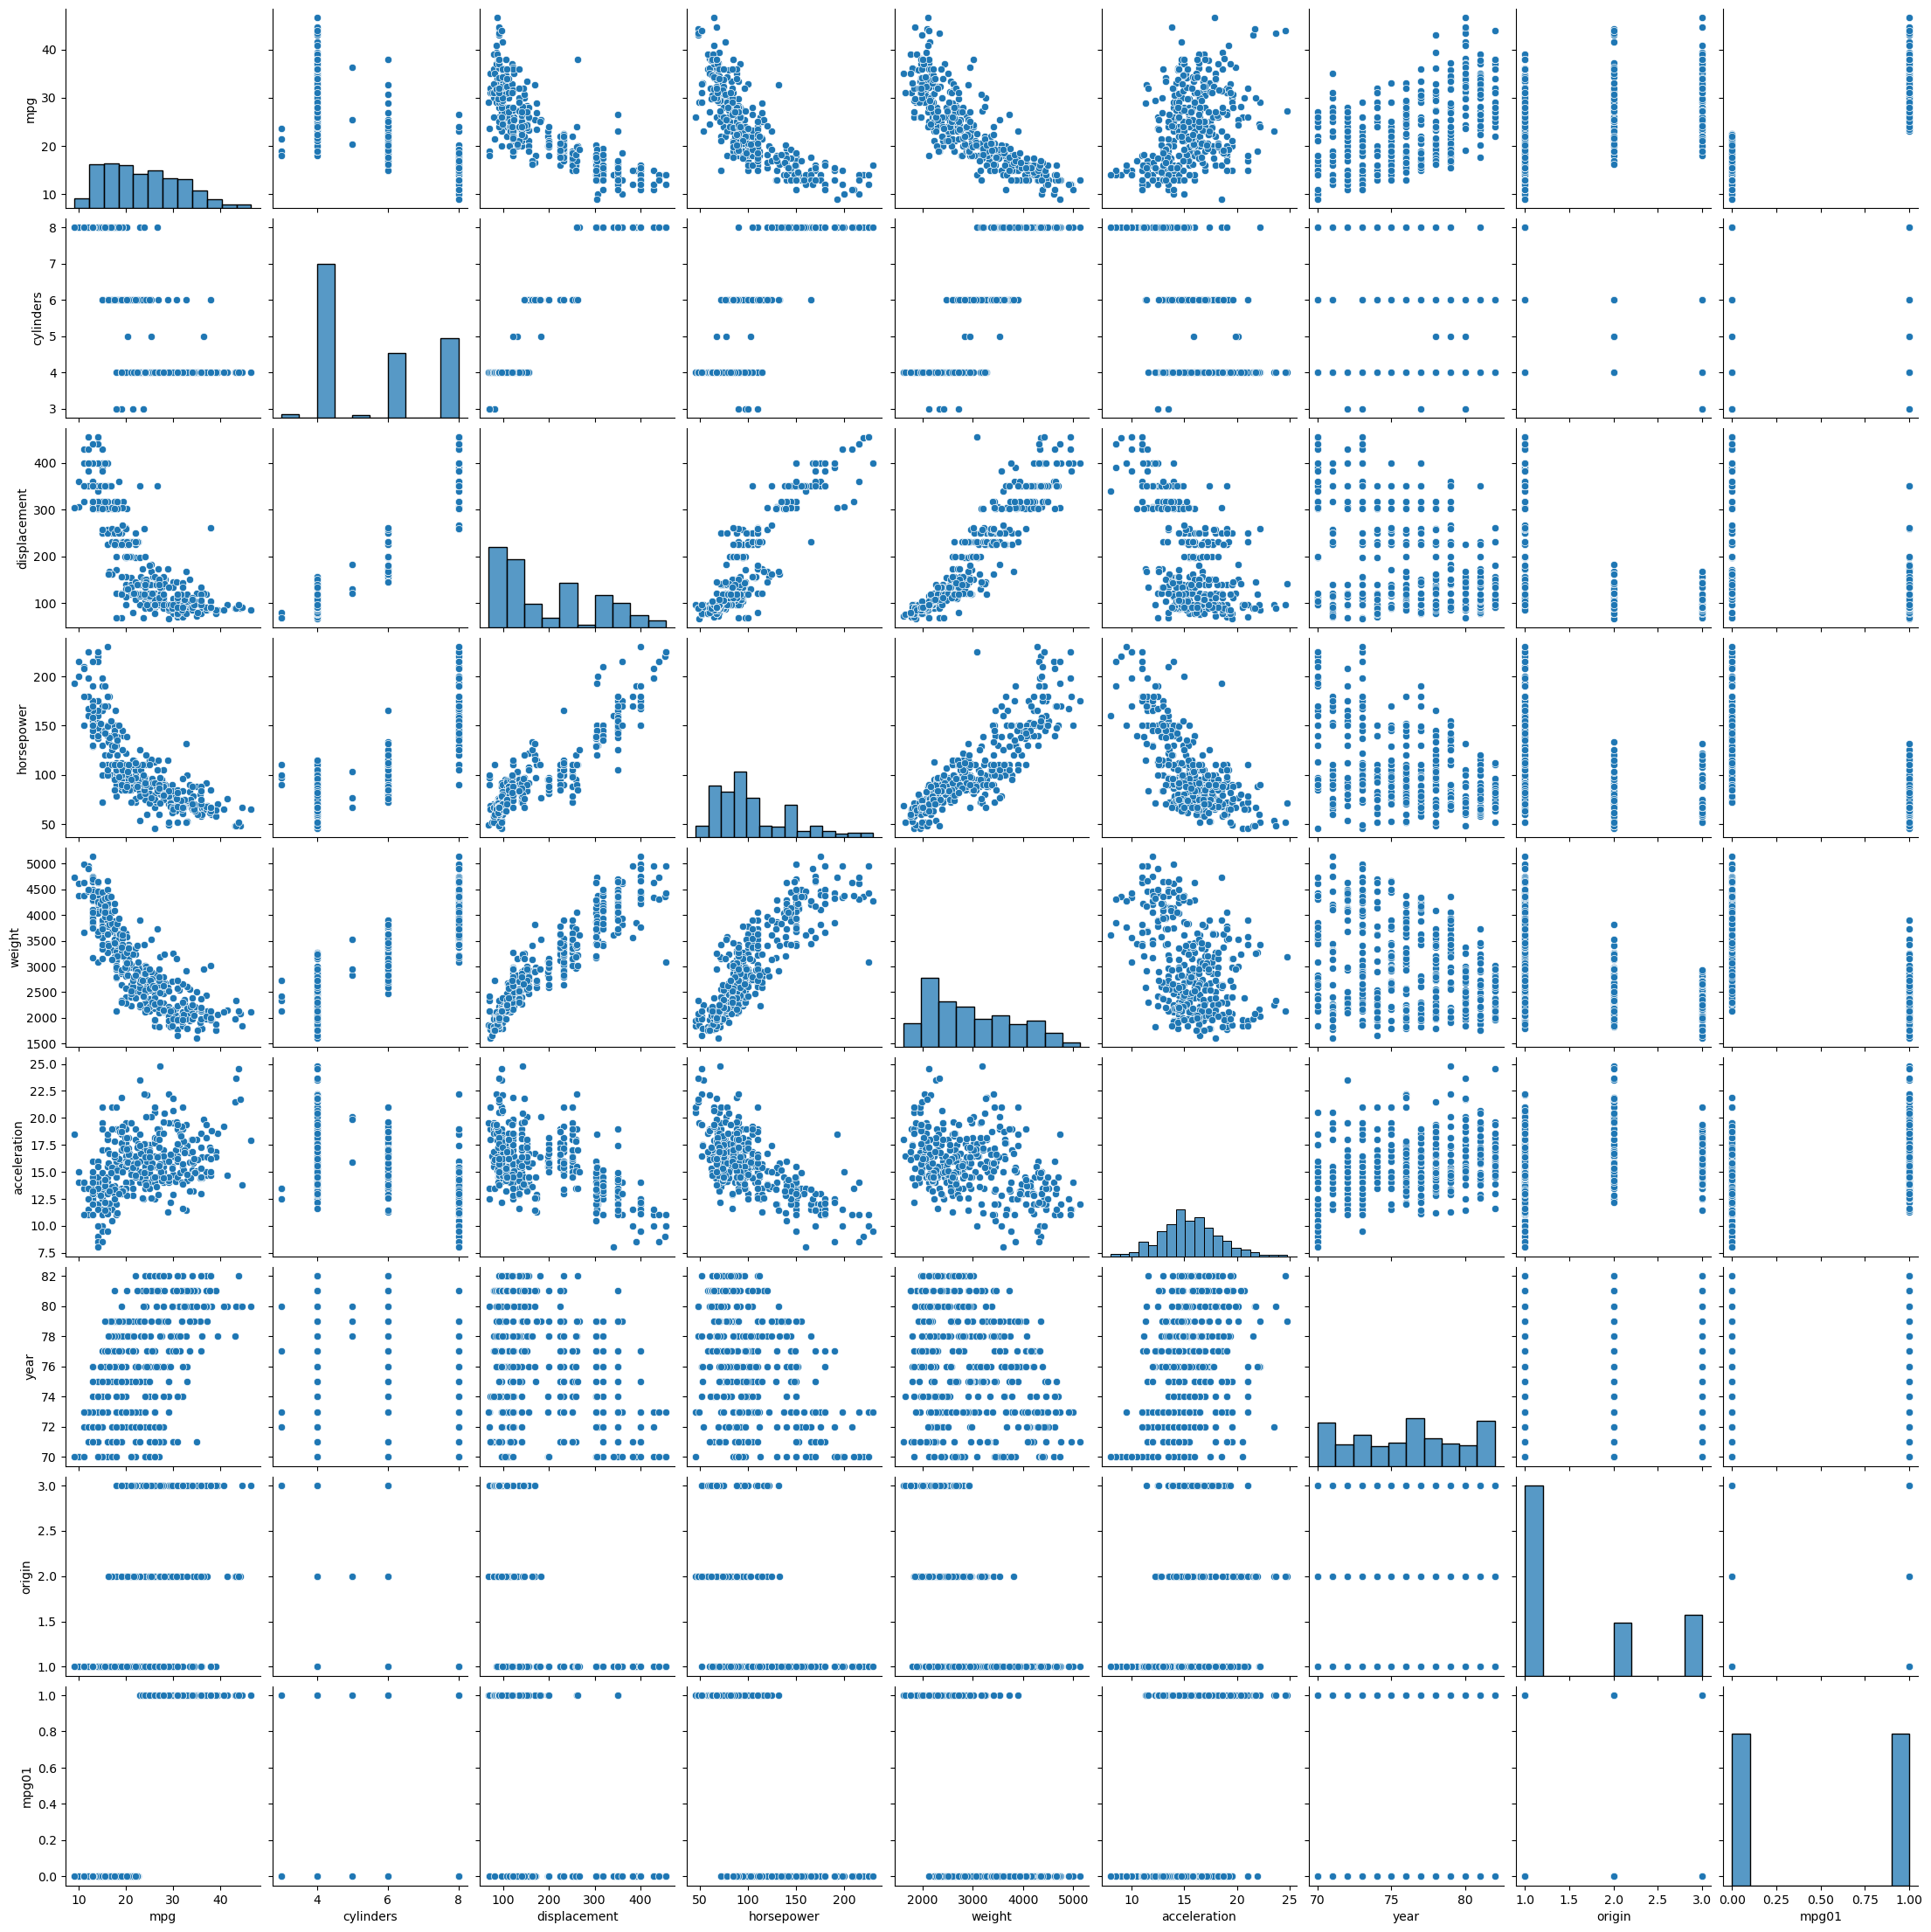

In [166]:
sns.pairplot(Auto)

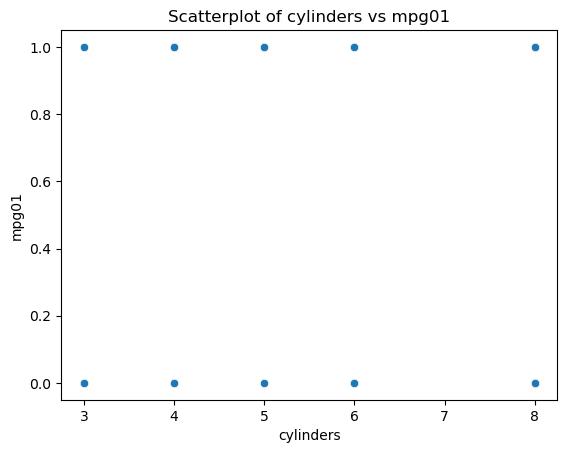

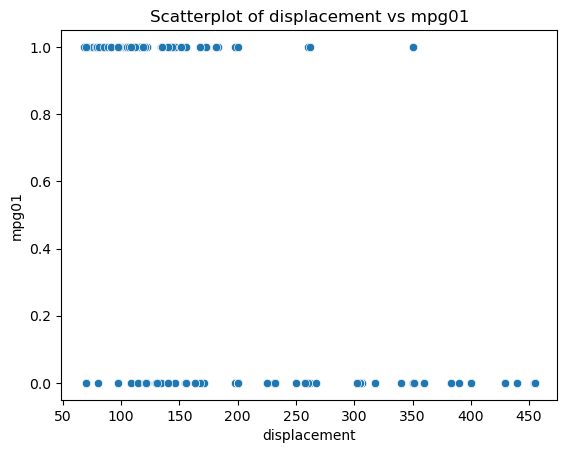

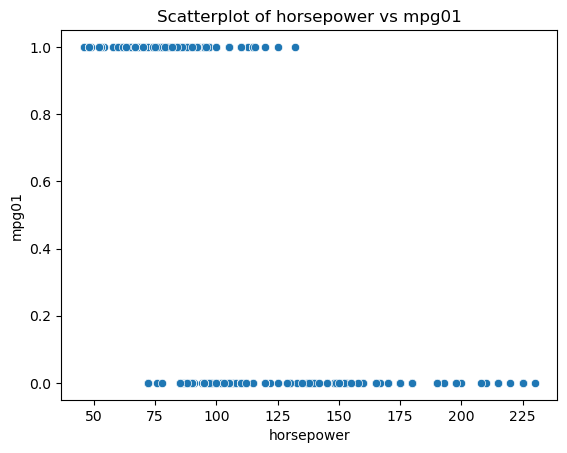

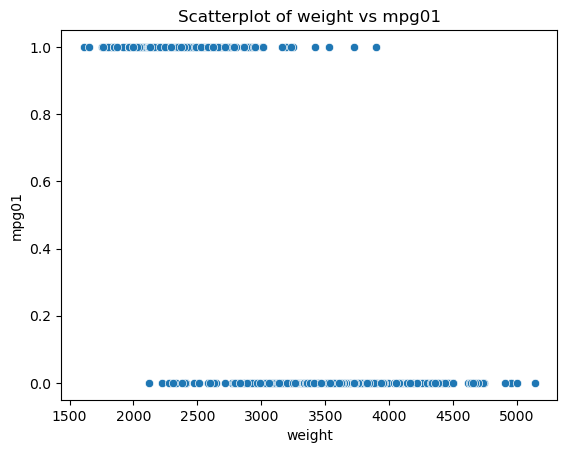

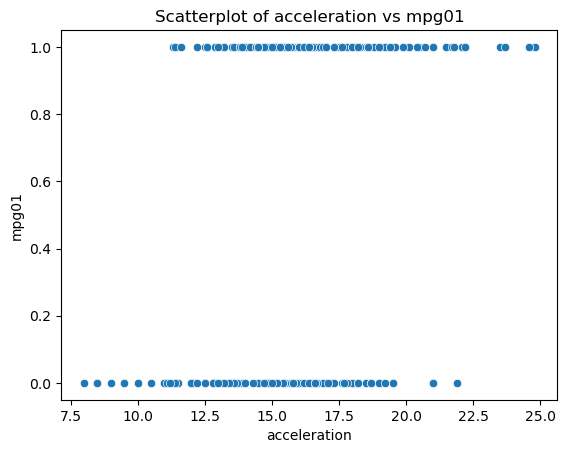

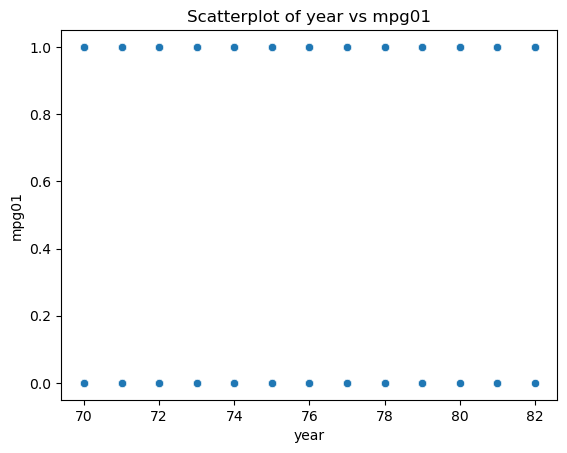

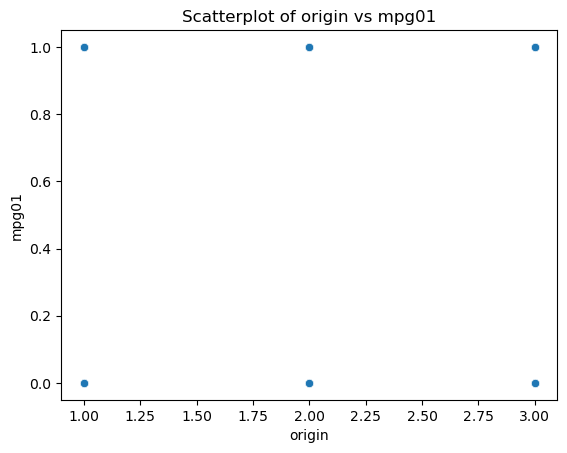

In [167]:
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
for feature in numerical_features:
    sns.scatterplot(x=feature, y='mpg01', data=Auto)
    plt.title(f'Scatterplot of {feature} vs mpg01')
    plt.xlabel(feature)
    plt.ylabel('mpg01')
    plt.show()


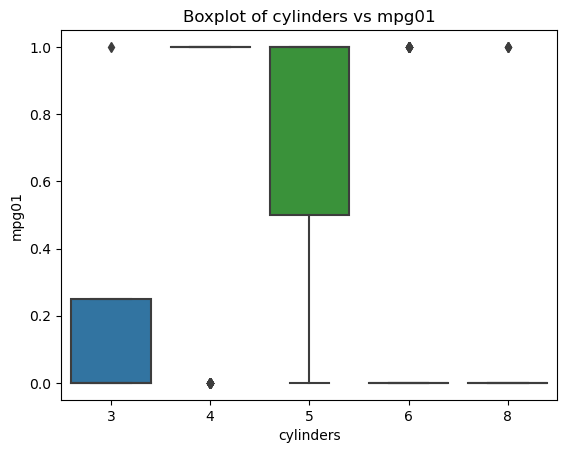

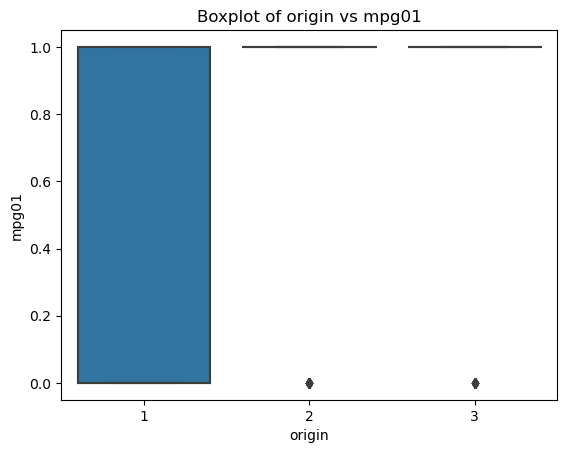

In [168]:
categorical_features = ['cylinders', 'origin']
for feature in categorical_features:
    sns.boxplot(x=feature, y='mpg01', data=Auto)
    plt.title(f'Boxplot of {feature} vs mpg01')
    plt.xlabel(feature)
    plt.ylabel('mpg01')
    plt.show()

### (c) Split the data into a training set and a test set.

In [169]:
X = Auto.drop('mpg01', axis=1).values  # Features
y = Auto['mpg01'].values  # Target variable

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in    (b). What is the test error of the model obtained? 

In [170]:
# Split the data into features (X) and target variable (y)
X = Auto[['cylinders', 'displacement', 'weight', 'year']]
y = Auto['mpg01']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
selected_features = ['cylinders', 'displacement', 'weight', 'year']
lda.fit(X_train[selected_features], y_train)

# Predict mpg01 for the test data
y_pred = lda.predict(X_test[selected_features])

# Compute the test error
test_error = 1 - accuracy_score(y_test, y_pred)
print("Test error of the LDA model:", test_error)

Test error of the LDA model: 0.10126582278481011


### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [171]:
qda = QuadraticDiscriminantAnalysis()

# Fit the LDA model on the training data
selected_features = ['cylinders', 'displacement', 'weight', 'year']
qda.fit(X_train[selected_features], y_train)

# Predict mpg01 for the test data
y_pred = qda.predict(X_test[selected_features])

# Compute the test error
test_error = 1 - accuracy_score(y_test, y_pred)
print("Test error of the QDA model:", test_error)

Test error of the QDA model: 0.11392405063291144


### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [172]:
log_reg = LogisticRegression()
selected_features = ['cylinders', 'displacement', 'weight', 'year']
log_reg.fit(X_train[selected_features], y_train)

# Predict mpg01 for the test data
y_pred = log_reg.predict(X_test[selected_features])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute overall fraction of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print("Overall Fraction of Correct Predictions:", accuracy)

Confusion Matrix:
[[35  5]
 [ 0 39]]
Overall Fraction of Correct Predictions: 0.9367088607594937


### (g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [173]:
nb = GaussianNB()
selected_features = ['cylinders', 'displacement', 'weight', 'year']
nb.fit(X_train[selected_features], y_train)

# Predict mpg01 for the test data
y_pred = nb.predict(X_test[selected_features])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute overall fraction of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print("Overall Fraction of Correct Predictions:", accuracy)

Confusion Matrix:
[[34  6]
 [ 3 36]]
Overall Fraction of Correct Predictions: 0.8860759493670886


### (h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [174]:
# Define a range of K values
k_values = [1,2, 3, 4, 5, 6, 7, 8, 9]

# Initialize lists to store test errors for each K value
test_errors = []

# Fit KNN models and compute test errors for each K value
for k in k_values:
    # Fit KNN model on the training data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[selected_features], y_train)
    
    # Predict mpg01 for the test data
    y_pred = knn.predict(X_test[selected_features])
    
    # Compute test error
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(test_error)
    
    print(f"Test Error for K={k}: {test_error}")

# Determine the best value of K
best_k = k_values[test_errors.index(min(test_errors))]
print(f"\nBest value of K: {best_k}")

Test Error for K=1: 0.17721518987341767
Test Error for K=2: 0.189873417721519
Test Error for K=3: 0.15189873417721522
Test Error for K=4: 0.20253164556962022
Test Error for K=5: 0.1392405063291139
Test Error for K=6: 0.15189873417721522
Test Error for K=7: 0.12658227848101267
Test Error for K=8: 0.1392405063291139
Test Error for K=9: 0.11392405063291144

Best value of K: 9


### 16. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings. Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.

In [175]:
Boston = pd.read_csv('Boston.csv',na_values=['?']).dropna()
Boston

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio  lstat  medv  
0    296     15.3   4.98  24.0  
1    242     17.8   9.14  21.6  
2    242     17.8   4.03  34.7  
3    222     18.7   2.94  33.4  
4    222     18.7   5.33  36.2  
..   ...      ...    ...   ...  
501  273     21.0   9.67  22.4  
502  273     21.0   9.08  20.6  
503  273     21.0   5.64  23.9  
504  273     21.0   6.48  22.0  
505  273     21.0   7.88  11.9  

[506 rows x 14 columns]

In [176]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [177]:
Boston.describe()

Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.148861    2.105710    8.707259  168.537116    2.164946   
min      3.561000    2.900000    1.129600    1.000000  187.000000   12.600000   
25%      5.885500   45.025000    2.100175    4.000000  279.000000   17.400000   
50%      6.208500   77.500000    3.207450    5.000000  330.000000   19.050000   
75%      6.623500   94.075000    5.188425   24.000000  666.000000   20.200000   
max      8.780000  100.000000   12.126500   24.000000  711.000000   22.000000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

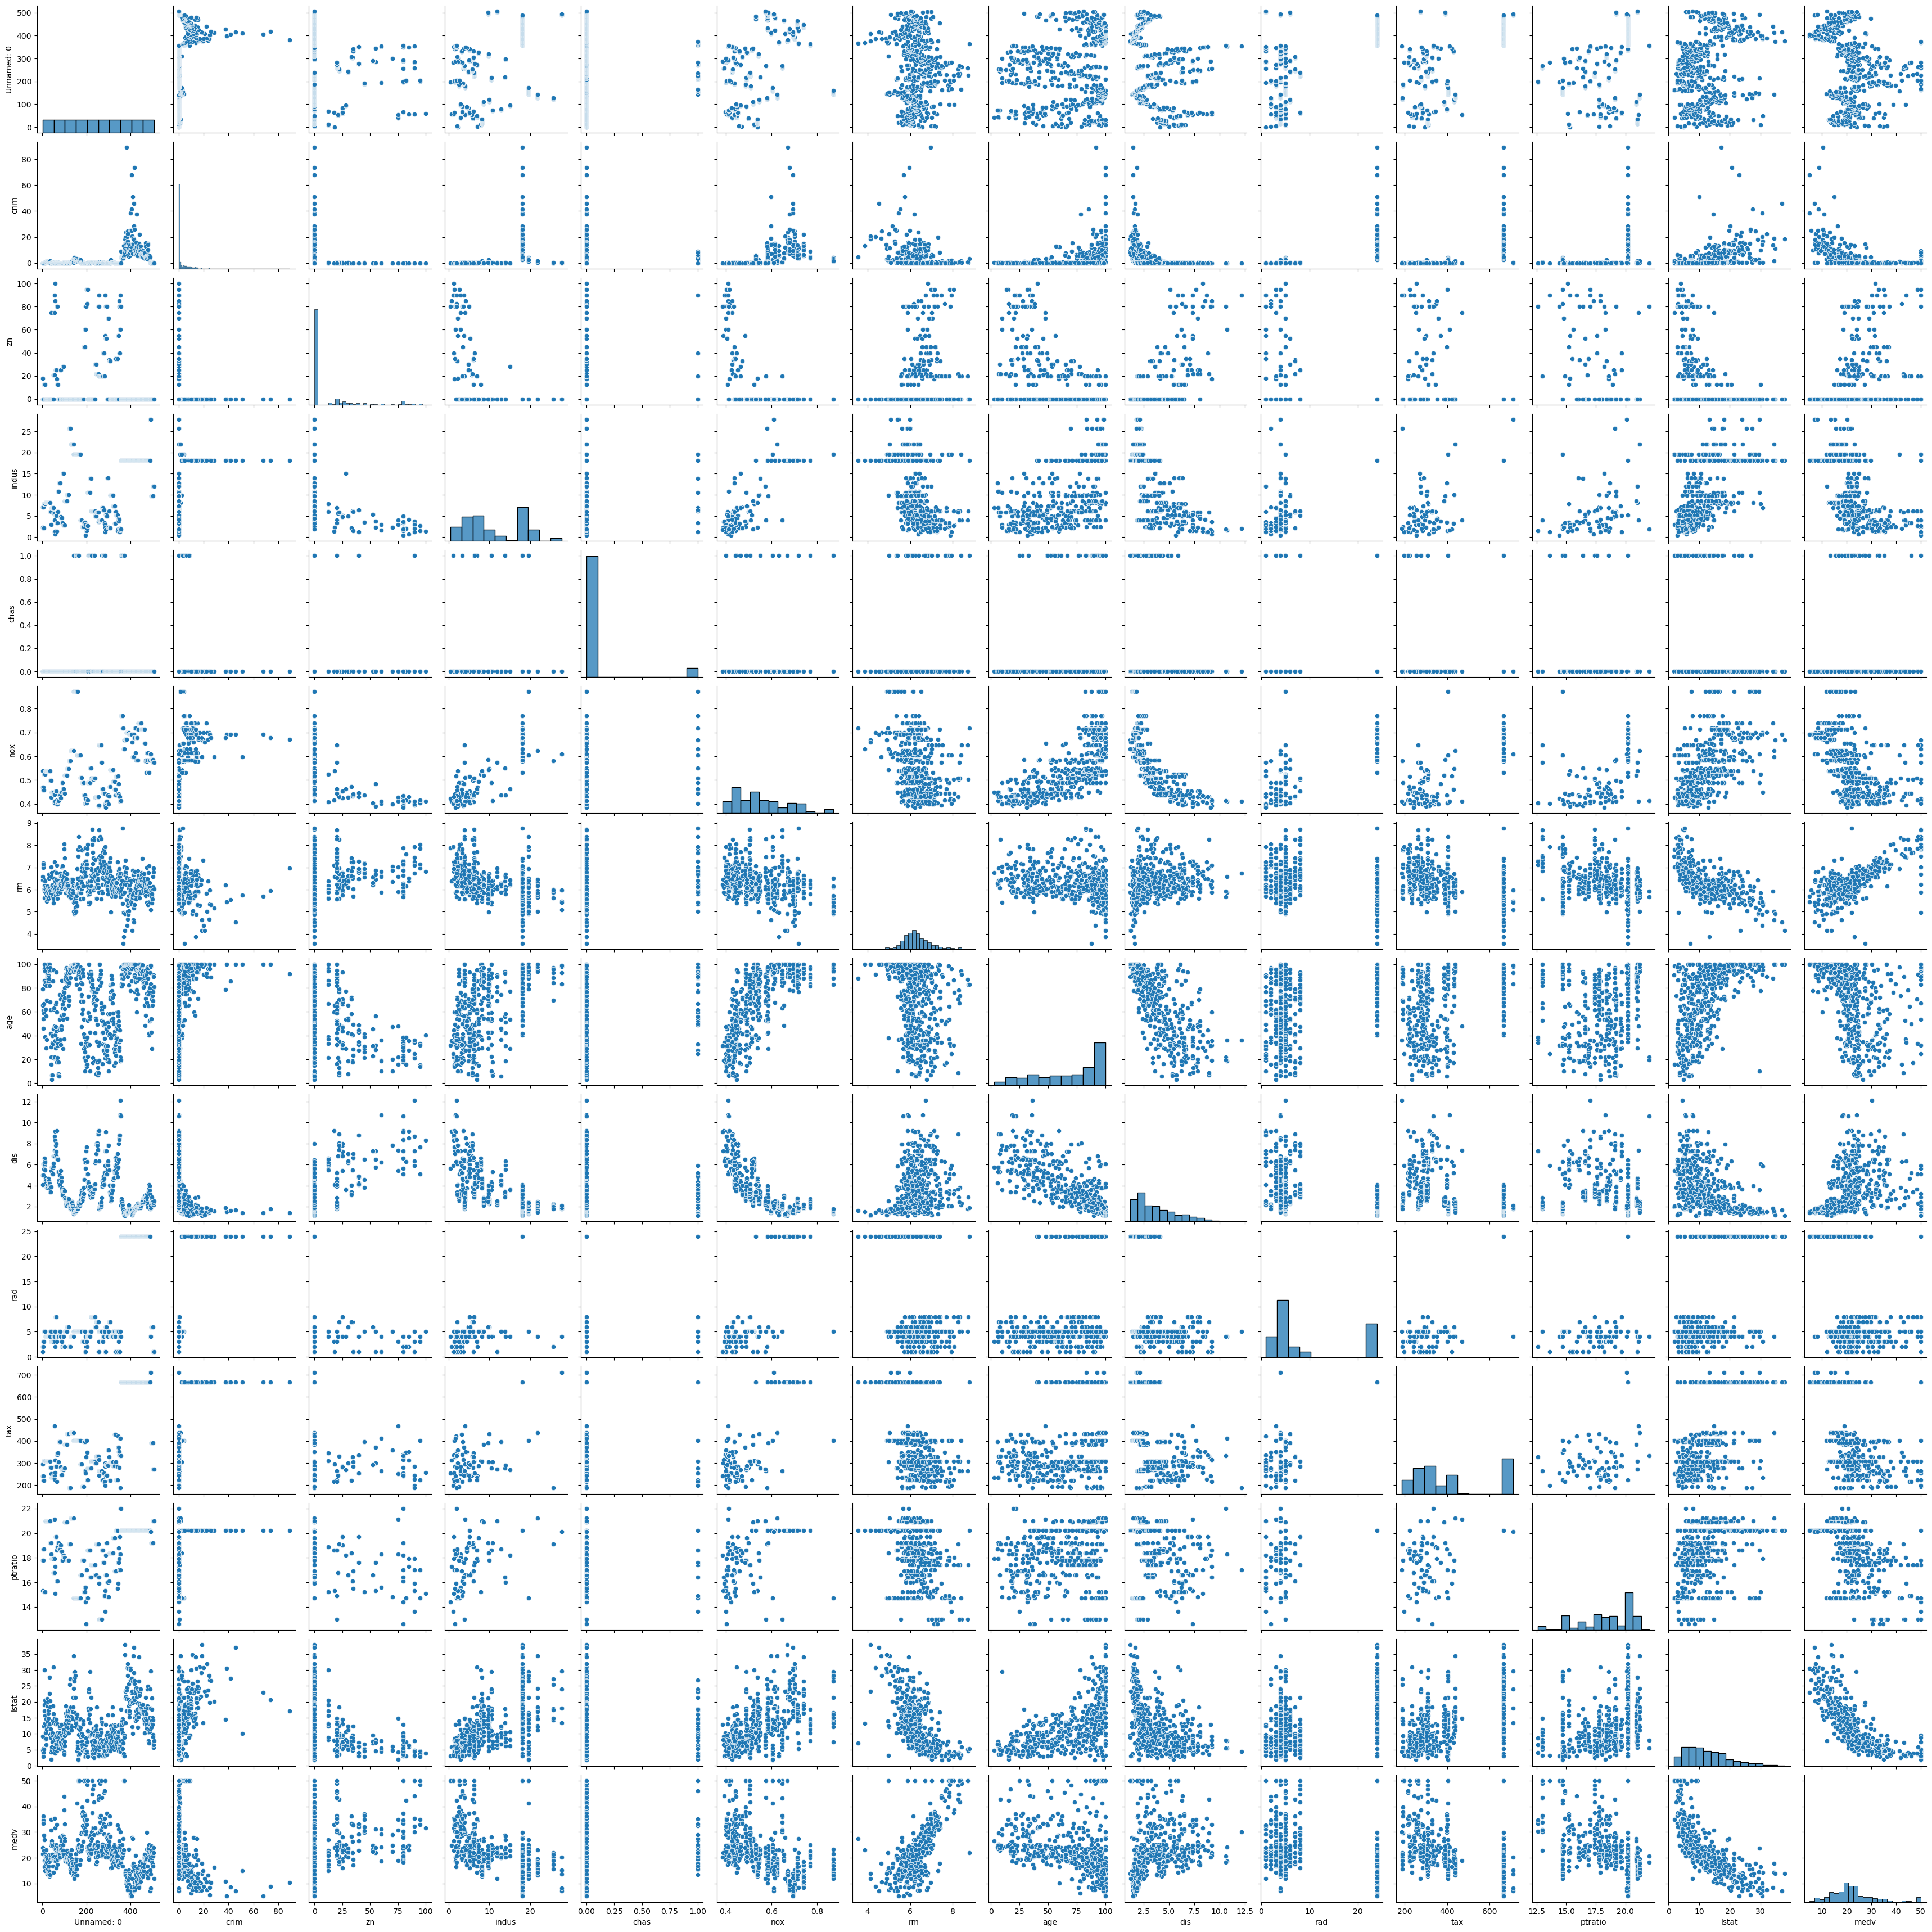

In [178]:
sns.pairplot(Boston)

In [179]:
median_crime = Boston['crim'].median()
median_crime
Boston['crime_1'] = (Boston['crim'] > median_crime).astype(int)
Boston

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio  lstat  medv  crime_1  
0    296     15.3   4.98  24.0        0  
1    242     17.8   9.14  21.6        0  
2    242     17.8   4.03  34.7        0  
3    222     18.7   2.94  33.4        0  
4    222     18.7   5.33  36.2        0  
..   ...      ...    ...   ...      ...  
501  273     21.0   9.67  22.4        0  
502  273     21.0   9.08  20.6        0  
503  273     21.0   5.64  23.9        0  
504  273     21.0   6.48  22.0        0  
505  273     21.0   7.88  11.9        0  

[506 rows x 15 columns]

In [180]:
X = Boston[['indus','nox','age','dis','rad','tax']].values  # Features
y = Boston['crime_1'].values  # Target variable

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
#LDA
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Predict mpg01 for the test data
y_pred = lda.predict(X_test)

# Compute the test error
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Overall Fraction of Correct Predictions:", accuracy)

test_error = 1 - accuracy_score(y_test, y_pred)
print("Test error of the LDA model:", test_error)

Confusion Matrix:
[[47  5]
 [13 37]]
Overall Fraction of Correct Predictions: 0.8235294117647058
Test error of the LDA model: 0.17647058823529416


In [182]:
#Logistic
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

# Predict mpg01 for the test data
y_pred = log_reg.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Overall Fraction of Correct Predictions:", accuracy)

test_error = 1 - accuracy_score(y_test, y_pred)
print("Test error of the LDA model:", test_error)

Confusion Matrix:
[[43  9]
 [ 9 41]]
Overall Fraction of Correct Predictions: 0.8235294117647058
Test error of the LDA model: 0.17647058823529416


In [183]:
#KNN
# Define a range of K values
k_values = [1,2, 3, 4, 5, 6, 7, 8, 9]

# Initialize lists to store test errors for each K value
test_errors = []

# Fit KNN models and compute test errors for each K value
for k in k_values:
    # Fit KNN model on the training data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict mpg01 for the test data
    y_pred = knn.predict(X_test)
    
    # Compute test error
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(test_error)
    
    print(f"Test Error for K={k}: {test_error}")

# Determine the best value of K
best_k = k_values[test_errors.index(min(test_errors))]
print(f"\nBest value of K: {best_k}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Overall Fraction of Correct Predictions:", accuracy)

test_error = 1 - accuracy_score(y_test, y_pred)
print("Test error of the LDA model:", test_error)

Test Error for K=1: 0.13725490196078427
Test Error for K=2: 0.11764705882352944
Test Error for K=3: 0.11764705882352944
Test Error for K=4: 0.11764705882352944
Test Error for K=5: 0.11764705882352944
Test Error for K=6: 0.11764705882352944
Test Error for K=7: 0.13725490196078427
Test Error for K=8: 0.13725490196078427
Test Error for K=9: 0.1470588235294118

Best value of K: 2
Confusion Matrix:
[[45  7]
 [ 8 42]]
Overall Fraction of Correct Predictions: 0.8529411764705882
Test error of the LDA model: 0.1470588235294118


In [184]:
#naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict mpg01 for the test data
y_pred = nb.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Overall Fraction of Correct Predictions:", accuracy)

test_error = 1 - accuracy_score(y_test, y_pred)
print("Test error of the LDA model:", test_error)

Confusion Matrix:
[[47  5]
 [12 38]]
Overall Fraction of Correct Predictions: 0.8333333333333334
Test error of the LDA model: 0.16666666666666663


Based on the findings from the various classification models applied to the Boston dataset:

Logistic Regression and LDA produced similar results, with an overall fraction of correct predictions around 82%. The test error for both models was approximately 17%.

KNN with the best value of K=2 achieved an overall fraction of correct predictions of approximately 85%. The test error for this model was around 15%.

Naive Bayes also performed well, with an overall fraction of correct predictions of about 83% and a test error of around 17%.

Overall, all models achieved relatively high accuracies in predicting whether a given suburb has a crime rate above or below the median. However, KNN with K=2 achieved the highest accuracy among the models tested, suggesting that it might be the most suitable model for this classification task.